In [136]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats, synergyplaytypes
from nba_api.stats.endpoints import teamyearbyyearstats, playercareerstats
from nba_api.stats.static.players import find_players_by_full_name, find_player_by_id

from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
from matplotlib.patches import Circle, FancyArrowPatch, FancyArrow, ArrowStyle, Arrow
import matplotlib.ticker as mtick
import time
from tqdm import tqdm
from sklearn.cluster import KMeans
import numpy as np
import functools


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('fivethirtyeight')

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_1808/852271923.py:19: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [103]:
play_types = ['Spotup', 'Isolation', 'Transition', 
              'PRBallHandler', 'PRRollman', 
              'Postup', 'Handoff', 'Cut', 'OffScreen',
              'OffRebound']

play_types_dict = {}

for play_type in tqdm(play_types):
    
    type_players = synergyplaytypes.SynergyPlayTypes(league_id='00', per_mode_simple='PerGame', 
                                                          player_or_team_abbreviation='P',
                                                          season_type_all_star='Regular Season',
                                                          season='2022-23',
                                                          play_type_nullable=play_type,
                                                          type_grouping_nullable='offensive').get_data_frames()[0]
    
    play_types_dict[play_type] = type_players
    
    time.sleep(1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.63s/it]


In [104]:
dash_players = leaguedashplayerstats.LeagueDashPlayerStats(per_mode_detailed='PerGame',
                                                                    season='2022-23',
                                                                    season_type_all_star='Regular Season',
                                                                    measure_type_detailed_defense='Scoring').get_data_frames()[0]

# dash_players_scoring = leaguedashplayerstats.LeagueDashPlayerStats(per_mode_detailed='PerGame',
#                                                                     season='2022-23',
#                                                                     season_type_all_star='Regular Season',
#                                                                     measure_type_detailed_defense='Scoring').get_data_frames()[0]

time.sleep(1)

dash_players.columns

dash_players_names = list(dash_players.columns[11:])
for df_name in dash_players_names:
        dash_players.rename(columns = {df_name : f'{df_name}_Scoring'}, inplace = True)

In [105]:
dash_players.columns


Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'PCT_FGA_2PT_Scoring',
       'PCT_FGA_3PT_Scoring', 'PCT_PTS_2PT_Scoring', 'PCT_PTS_2PT_MR_Scoring',
       'PCT_PTS_3PT_Scoring', 'PCT_PTS_FB_Scoring', 'PCT_PTS_FT_Scoring',
       'PCT_PTS_OFF_TOV_Scoring', 'PCT_PTS_PAINT_Scoring',
       'PCT_AST_2PM_Scoring', 'PCT_UAST_2PM_Scoring', 'PCT_AST_3PM_Scoring',
       'PCT_UAST_3PM_Scoring', 'PCT_AST_FGM_Scoring', 'PCT_UAST_FGM_Scoring',
       'FGM_Scoring', 'FGA_Scoring', 'FG_PCT_Scoring', 'GP_RANK_Scoring',
       'W_RANK_Scoring', 'L_RANK_Scoring', 'W_PCT_RANK_Scoring',
       'MIN_RANK_Scoring', 'PCT_FGA_2PT_RANK_Scoring',
       'PCT_FGA_3PT_RANK_Scoring', 'PCT_PTS_2PT_RANK_Scoring',
       'PCT_PTS_2PT_MR_RANK_Scoring', 'PCT_PTS_3PT_RANK_Scoring',
       'PCT_PTS_FB_RANK_Scoring', 'PCT_PTS_FT_RANK_Scoring',
       'PCT_PTS_OFF_TOV_RANK_Scoring', 'PCT_PTS_PAINT_RANK_Scoring',
       'PCT_AST_2PM_RANK_Scoring

In [106]:
for playtype, df in play_types_dict.items():
    print(f'{len(df)} -\t {playtype}')

457 -	 Spotup
252 -	 Isolation
452 -	 Transition
316 -	 PRBallHandler
266 -	 PRRollman
163 -	 Postup
280 -	 Handoff
351 -	 Cut
226 -	 OffScreen
325 -	 OffRebound


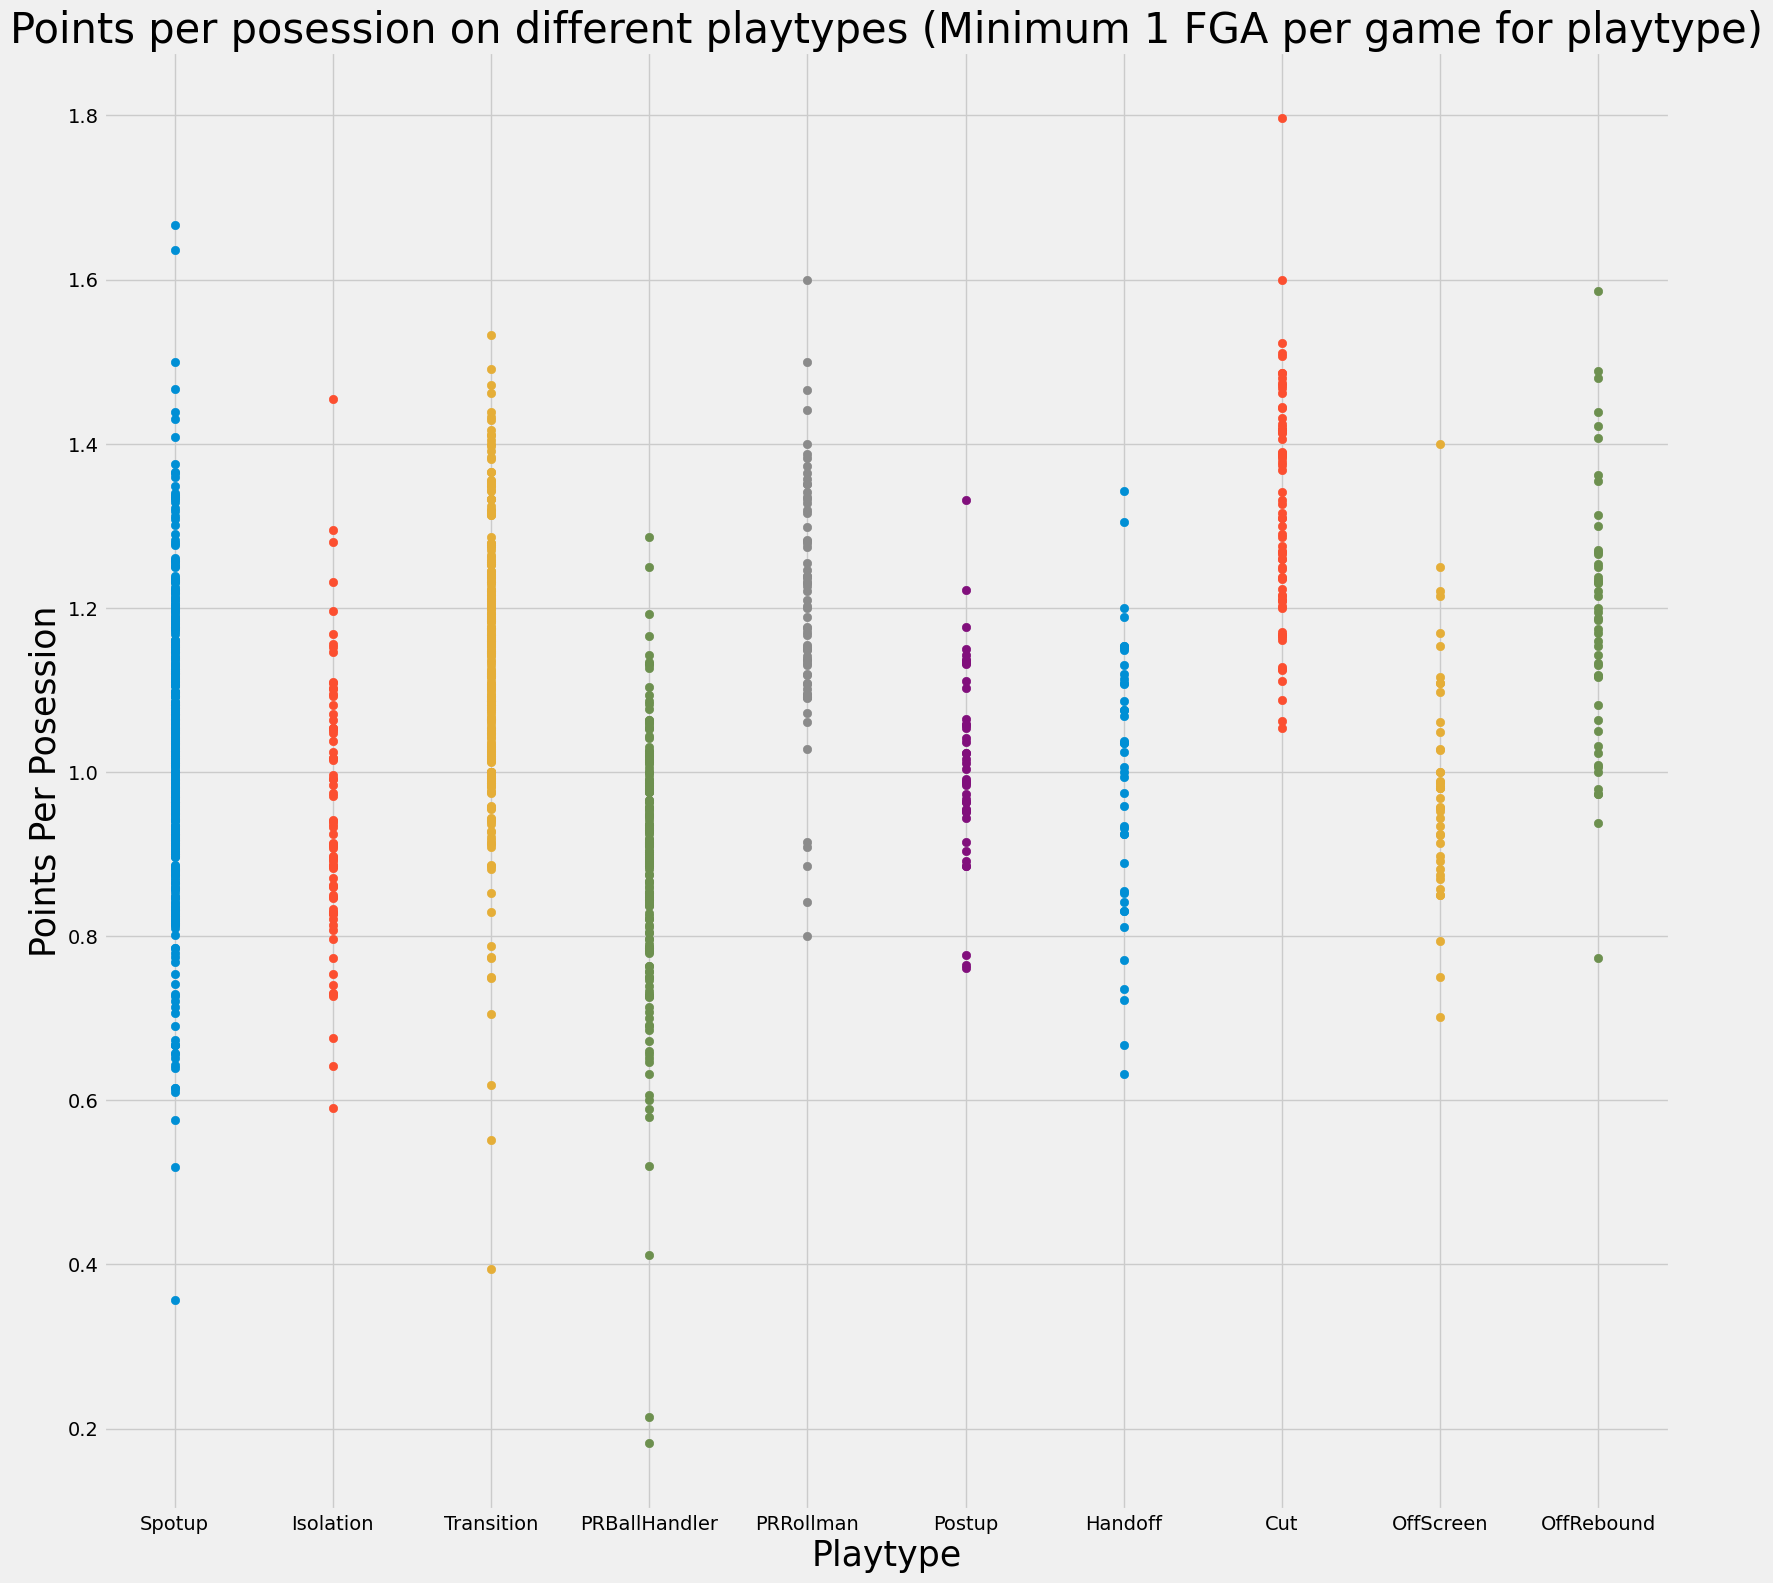

In [107]:
fig, ax = plt.subplots(figsize=(18, 18))

for i, (play_type, df) in enumerate(play_types_dict.items()):
    
    df_to_draw = df[df['FGA'] > 1]['PPP']
    
    ax.scatter([i] * len(df_to_draw), df_to_draw, label = play_type)
    
    # df_to_draw.median()
    
    # print(play_type, len(df[df['PPP'] > 1]['PPP']))
    
    ab = AnnotationBbox(TextArea('Median'), (i, df_to_draw.median()), frameon=False)
    # ax.add_artist(ab)


ax.set_xlabel("Playtype", fontsize=25)
ax.set_ylabel("Points Per Posession", fontsize=25)
ax.set_xticks(list(range(len(play_types_dict.keys()))))
ax.set_xticklabels(list(play_types_dict.keys()))
plt.title('Points per posession on different playtypes (Minimum 1 FGA per game for playtype)', fontsize=30)
plt.savefig('Graphs/ppp_playtype.png', bbox_inches='tight')

In [108]:
for i, (play_type, df_) in enumerate(play_types_dict.items()):
    # for j, column in enumerate(df.columns):
    #     print(j, column)
    
    # print(list(df.columns[8:]))
    
    df_names= list(df_.columns[6:])
    for df_name in df_names:
        df_.rename(columns = {df_name : f'{df_name}_{play_type}'}, inplace = True)

    # break

In [109]:
play_types_dict['Isolation'].columns

Index(['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'PLAY_TYPE_Isolation', 'TYPE_GROUPING_Isolation',
       'PERCENTILE_Isolation', 'GP_Isolation', 'POSS_PCT_Isolation',
       'PPP_Isolation', 'FG_PCT_Isolation', 'FT_POSS_PCT_Isolation',
       'TOV_POSS_PCT_Isolation', 'SF_POSS_PCT_Isolation',
       'PLUSONE_POSS_PCT_Isolation', 'SCORE_POSS_PCT_Isolation',
       'EFG_PCT_Isolation', 'POSS_Isolation', 'PTS_Isolation', 'FGM_Isolation',
       'FGA_Isolation', 'FGMX_Isolation'],
      dtype='object')

In [110]:
dfs = list(play_types_dict.values())

names_to_group = []
for i, (play_type, df_) in enumerate(play_types_dict.items()):
    for j, column in enumerate(df_.columns):
        if j < 6:
            names_to_group.append(column)
        print(j, column)
        
    break
    
print(names_to_group)

0 SEASON_ID
1 PLAYER_ID
2 PLAYER_NAME
3 TEAM_ID
4 TEAM_ABBREVIATION
5 TEAM_NAME
6 PLAY_TYPE_Spotup
7 TYPE_GROUPING_Spotup
8 PERCENTILE_Spotup
9 GP_Spotup
10 POSS_PCT_Spotup
11 PPP_Spotup
12 FG_PCT_Spotup
13 FT_POSS_PCT_Spotup
14 TOV_POSS_PCT_Spotup
15 SF_POSS_PCT_Spotup
16 PLUSONE_POSS_PCT_Spotup
17 SCORE_POSS_PCT_Spotup
18 EFG_PCT_Spotup
19 POSS_Spotup
20 PTS_Spotup
21 FGM_Spotup
22 FGA_Spotup
23 FGMX_Spotup
['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME']


In [152]:
df_final = functools.reduce(lambda left, right: pd.merge(left, right, on=names_to_group, how='left'), dfs)

df_final = df_final.fillna(0)

df_final = pd.merge(df_final, dash_players, on=['PLAYER_ID', 'PLAYER_NAME'])

df_final = df_final[(df_final['MIN'] > 25) & (df_final['GP'] > 40)]

df_final

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID_x,TEAM_ABBREVIATION_x,TEAM_NAME,PLAY_TYPE_Spotup,TYPE_GROUPING_Spotup,PERCENTILE_Spotup,GP_Spotup,...,PCT_PTS_PAINT_RANK_Scoring,PCT_AST_2PM_RANK_Scoring,PCT_UAST_2PM_RANK_Scoring,PCT_AST_3PM_RANK_Scoring,PCT_UAST_3PM_RANK_Scoring,PCT_AST_FGM_RANK_Scoring,PCT_UAST_FGM_RANK_Scoring,FGM_RANK_Scoring,FGA_RANK_Scoring,FG_PCT_RANK_Scoring
0,22022,203944,Julius Randle,1610612752,NYK,New York Knicks,Spotup,Offensive,0.613,77,...,317,406,118,401,91,413,121,11,4,253
1,22022,1630530,Trey Murphy III,1610612740,NOP,New Orleans Pelicans,Spotup,Offensive,0.871,79,...,403,151,373,222,270,103,431,91,91,195
2,22022,203501,Tim Hardaway Jr.,1610612742,DAL,Dallas Mavericks,Spotup,Offensive,0.695,71,...,494,199,325,309,183,122,405,110,78,435
3,22022,1627741,Buddy Hield,1610612754,IND,Indiana Pacers,Spotup,Offensive,0.894,80,...,473,276,248,314,174,175,359,50,44,260
4,22022,1629622,Max Strus,1610612748,MIA,Miami Heat,Spotup,Offensive,0.828,80,...,447,126,398,245,247,72,462,115,96,421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,22022,1627751,Jakob Poeltl,1610612759,SAS,San Antonio Spurs,Spotup,Offensive,0.816,46,...,22,180,344,491,326,289,245,90,126,36
425,22022,203500,Steven Adams,1610612763,MEM,Memphis Grizzlies,Spotup,Offensive,0.149,42,...,15,322,202,491,326,414,120,257,285,52
428,22022,1627732,Ben Simmons,1610612751,BKN,Brooklyn Nets,Spotup,Offensive,0.076,42,...,14,220,304,491,326,345,189,276,305,66
433,22022,203497,Rudy Gobert,1610612750,MIN,Minnesota Timberwolves,Spotup,Offensive,0.025,70,...,54,94,430,491,326,190,344,98,157,20


In [144]:
# nan_values = df_final[df_final.isna().any(axis=1)]

# print(nan_values)

for i in range(len(nan_values)):
    # print(nan_values.iloc[i].PLAYER_NAME)

# print(nan_values.iloc[0])

SyntaxError: unexpected EOF while parsing (3798063676.py, line 8)

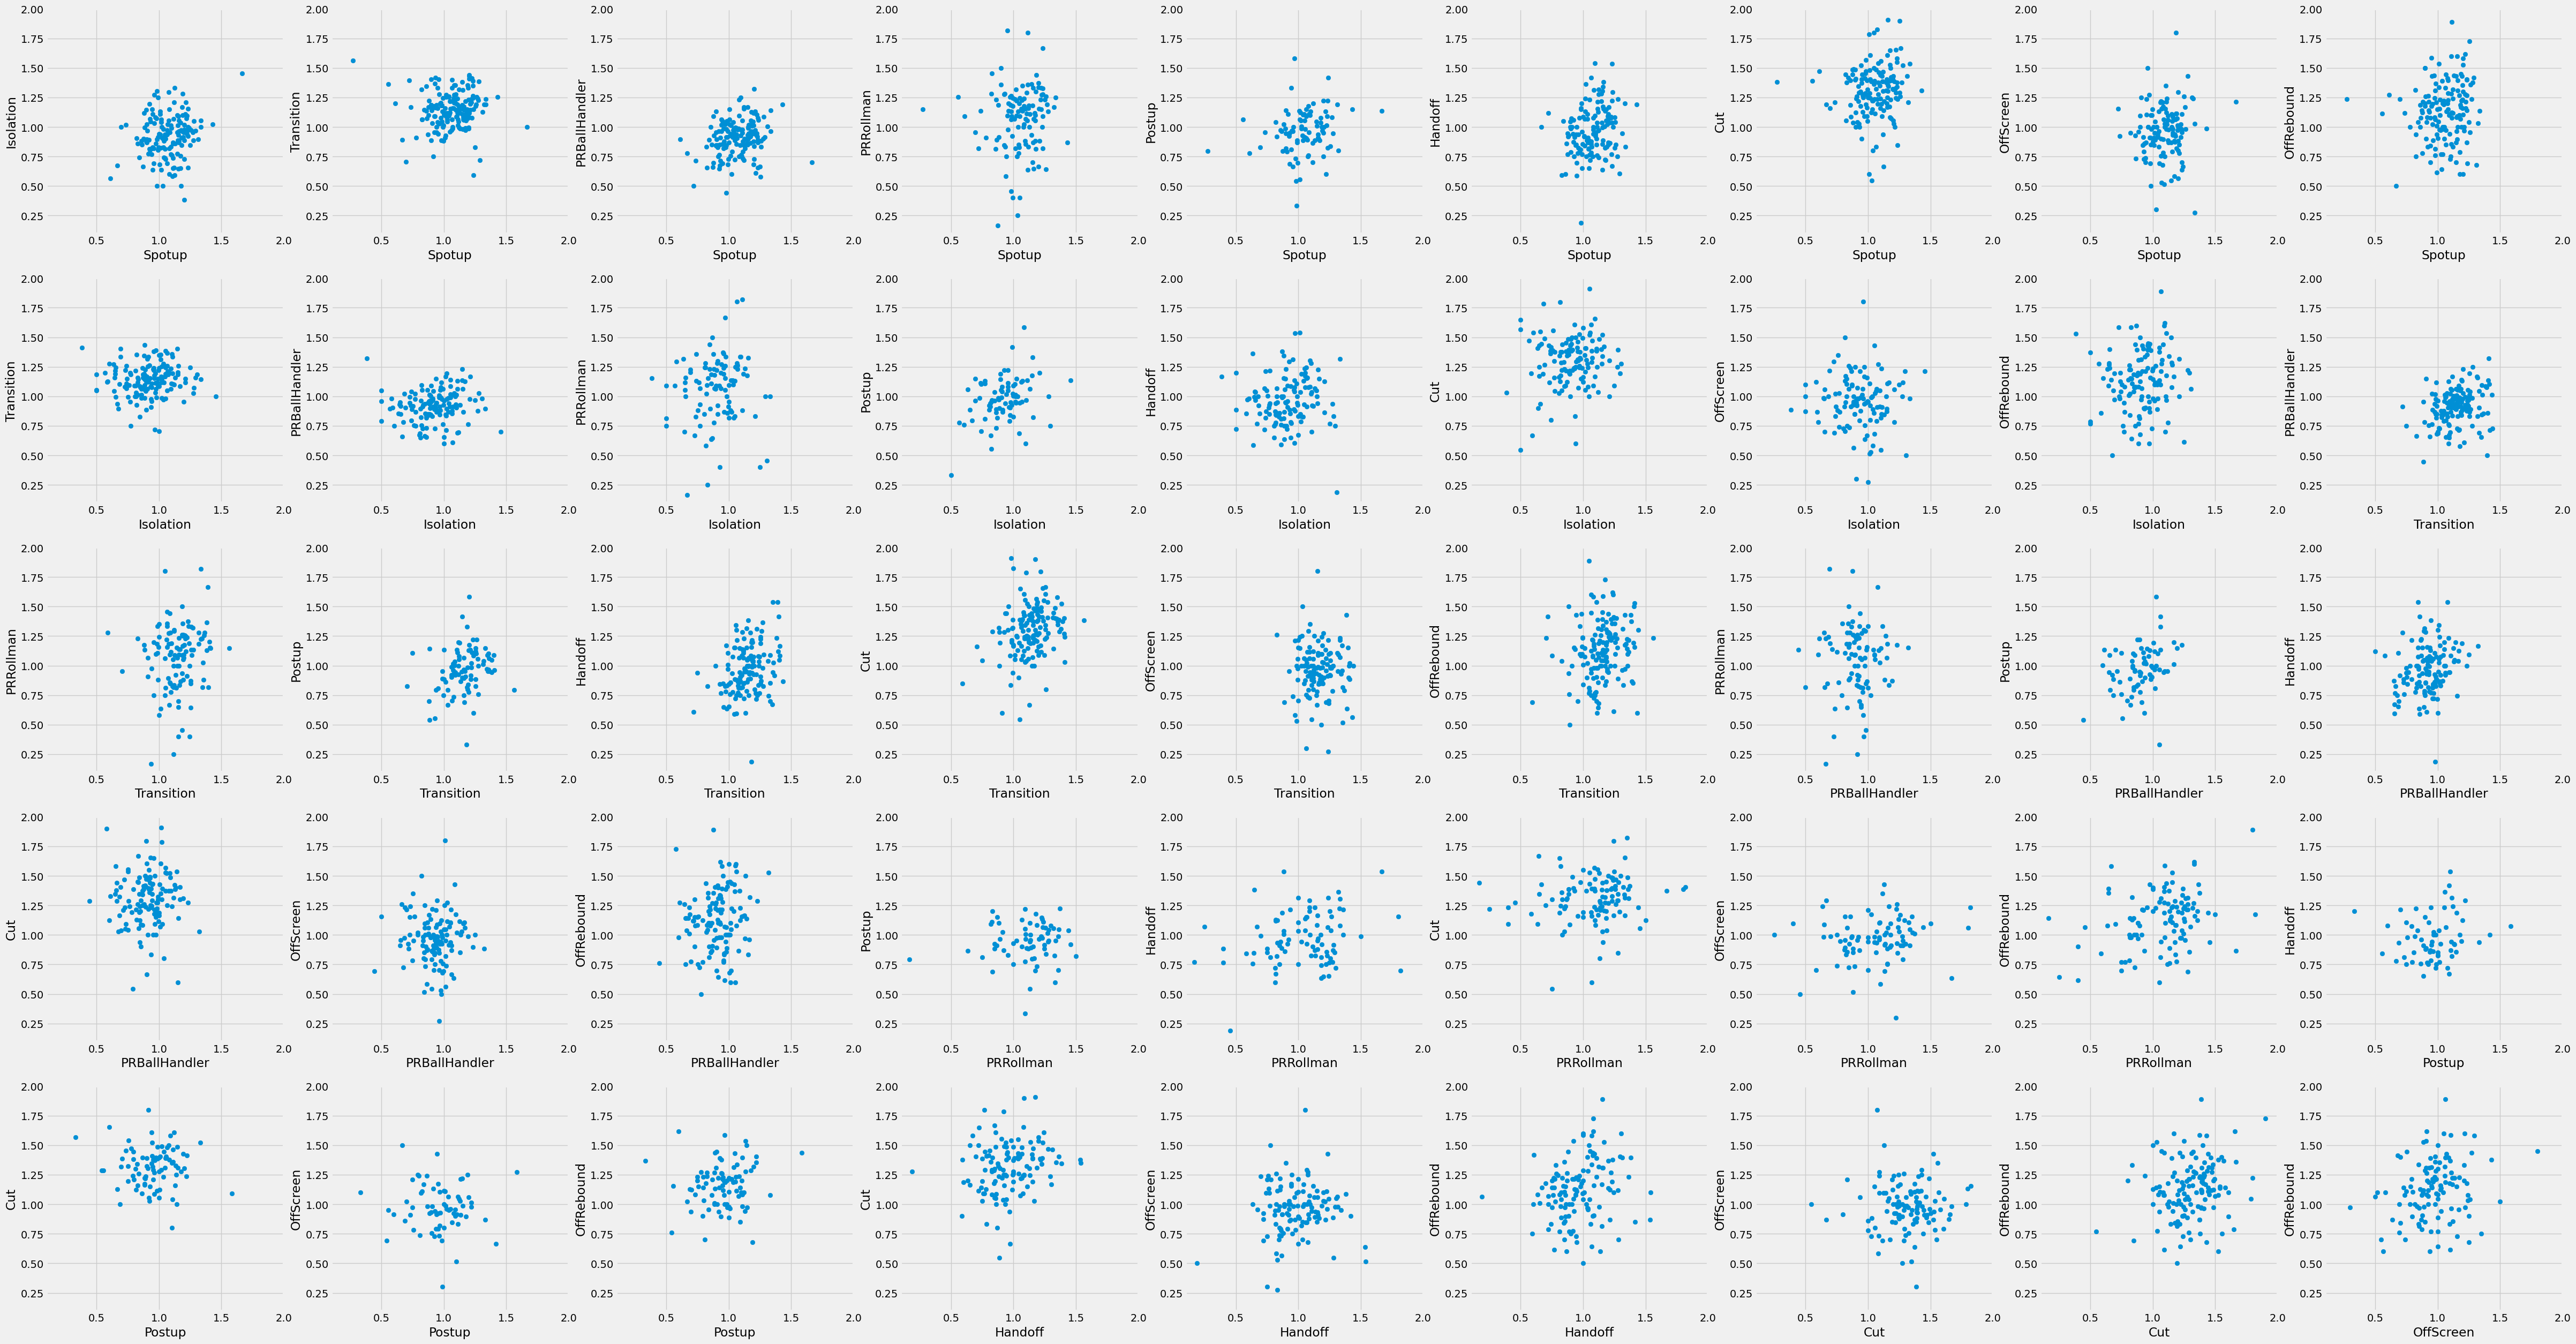

In [153]:
res = [(a, b) for idx, a in enumerate(play_types) for b in play_types[idx + 1:]]

# fig, axs = plt.subplots(nrows=7, ncols=7)
plt.figure(figsize=(54, 30))

for i, (a, b) in enumerate(res):
    ax = plt.subplot(5, 9, i + 1)
    ax.scatter(df_final[f'PPP_{a}'], df_final[f'PPP_{b}'])
    
    ax.set_xlim([0.1, 2])
    ax.set_ylim([0.1, 2])
    ax.set_xlabel(f'{a}')
    ax.set_ylabel(f'{b}')

In [154]:
dash_players.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'PCT_FGA_2PT_Scoring',
       'PCT_FGA_3PT_Scoring', 'PCT_PTS_2PT_Scoring', 'PCT_PTS_2PT_MR_Scoring',
       'PCT_PTS_3PT_Scoring', 'PCT_PTS_FB_Scoring', 'PCT_PTS_FT_Scoring',
       'PCT_PTS_OFF_TOV_Scoring', 'PCT_PTS_PAINT_Scoring',
       'PCT_AST_2PM_Scoring', 'PCT_UAST_2PM_Scoring', 'PCT_AST_3PM_Scoring',
       'PCT_UAST_3PM_Scoring', 'PCT_AST_FGM_Scoring', 'PCT_UAST_FGM_Scoring',
       'FGM_Scoring', 'FGA_Scoring', 'FG_PCT_Scoring', 'GP_RANK_Scoring',
       'W_RANK_Scoring', 'L_RANK_Scoring', 'W_PCT_RANK_Scoring',
       'MIN_RANK_Scoring', 'PCT_FGA_2PT_RANK_Scoring',
       'PCT_FGA_3PT_RANK_Scoring', 'PCT_PTS_2PT_RANK_Scoring',
       'PCT_PTS_2PT_MR_RANK_Scoring', 'PCT_PTS_3PT_RANK_Scoring',
       'PCT_PTS_FB_RANK_Scoring', 'PCT_PTS_FT_RANK_Scoring',
       'PCT_PTS_OFF_TOV_RANK_Scoring', 'PCT_PTS_PAINT_RANK_Scoring',
       'PCT_AST_2PM_RANK_Scoring

In [155]:
# categories we want - PPP, POSS, EFG_PCT
# categories we want from scoring - PCT_PTS_3PT_Scoring, PCT_PTS_PAINT_Scoring, PCT_PTS_FB_Scoring, PCT_PTS_2PT_MR_Scoring

categories = [f'PPP_{sufix}' for sufix in play_types]

# categories.extend([f'POSS_{sufix}' for sufix in play_types])
categories.extend(['PCT_PTS_3PT_Scoring', 'PCT_PTS_PAINT_Scoring', 'PCT_PTS_FB_Scoring', 'PCT_PTS_2PT_MR_Scoring'])


# categories.extend([f'EFG_PCT_{sufix}' for sufix in play_types])


ids = np.array(df_final['PLAYER_ID'])

xs = []

for category in categories:
    x = list(df_final[category])

    xs.append(list(x))
    
X = np.array(xs).T

print(X.shape)

(173, 14)


/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/franhuzjan/Documents/NBA/random/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

[-58.41289263 -39.53449189 -27.89507047 -19.66386515 -11.08380341
  -8.86673627  -8.7548755   -3.65129367]


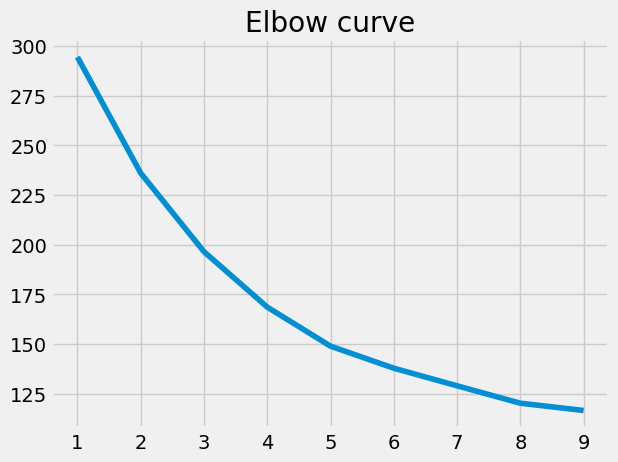

In [156]:
distorsions = []
max_number_of_clusters = 10

for k in range(1, max_number_of_clusters):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# fig = plt.figure(figsize=(15, 15))
plt.plot(range(1, max_number_of_clusters), distorsions)
plt.grid(True)
plt.title('Elbow curve')

print(np.diff(distorsions))

In [157]:
number_of_clusters = 5

kmeans = KMeans(n_clusters=number_of_clusters, n_init="auto").fit(X)

labels = kmeans.labels_
labels = labels.reshape((-1,1))  

print(labels.shape)
print(X.shape)

ids = np.array(df_final['PLAYER_ID']).reshape((-1, 1))

x_with_labels = np.concatenate((X, labels), axis=1)

# print(x_with_labels)

x_with_labels_ids = np.concatenate((X, labels, ids), axis=1)


unique, counts = np.unique(labels, return_counts=True)


for key, value in dict(zip(unique, counts)).items():
    print(f'{key} : {np.round((value / counts.sum()) * 100, 2)}%')


(173, 1)
(173, 14)
0 : 20.81%
1 : 27.17%
2 : 15.61%
3 : 23.7%
4 : 12.72%


In [164]:
from collections import defaultdict

groups = defaultdict(list)

for player in x_with_labels_ids:
    
    label = player[-2]
    id_ = player[-1]
    
    player_name = find_player_by_id(int(id_))['full_name']
    
    groups[label].append(player_name)
    

    
for label, names in groups.items():
    print('=' * 20)
    print(f'\tClass {int(label)}')
    print('-' * 20)
    for name in names:
        print(name)

	Class 1
--------------------
Julius Randle
P.J. Washington
Harrison Barnes
Michael Porter Jr.
Jerami Grant
Patrick Williams
Kyle Kuzma
Keldon Johnson
Jayson Tatum
Jaylen Brown
Lauri Markkanen
Zach LaVine
Jabari Smith Jr.
Marcus Morris Sr.
Tobias Harris
Kristaps Porzingis
Grant Williams
Klay Thompson
Mikal Bridges
Jaren Jackson Jr.
Bojan Bogdanovic
De'Andre Hunter
Franz Wagner
Christian Wood
Nikola Vucevic
Saddiq Bey
Bennedict Mathurin
Marcus Smart
Kelly Olynyk
Pascal Siakam
Jordan Clarkson
Paul George
De'Aaron Fox
Brandon Ingram
Paolo Banchero
Kevin Durant
Myles Turner
Giannis Antetokounmpo
Nikola Jokic
Bradley Beal
LeBron James
Jamal Murray
Gordon Hayward
Jimmy Butler
Anthony Davis
Aaron Gordon
Bam Adebayo
	Class 0
--------------------
Trey Murphy III
Tim Hardaway Jr.
Buddy Hield
Max Strus
Jaden McDaniels
Derrick White
Luguentz Dort
Gary Trent Jr.
Royce O'Neale
Tyrese Maxey
Corey Kispert
De'Anthony Melton
CJ McCollum
Mikal Bridges
Tyler Herro
Grayson Allen
Norman Powell
Kentavious Ca